<a href="https://colab.research.google.com/github/looloo404/Object_Detection/blob/master/TF_hub_efficientdet_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Sat Aug 19 07:42:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    31W /  70W |   1219MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
# 이미지 데이터 디렉토리를 만들고 이미지 다운로드 (권철민의 객체 탐지 강의의 이미지 자료를 가져옴)
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2023-08-19 07:42:30--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2023-08-19 07:42:30 (18.6 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



TF Hub 이용 Efficientdet d0 pretrained 모델 다운 및 inference 수행
1. tfhub.dev 에서 Efficientdet 모델 검색
2. URL 복사 및 hub.load로 불러들임

In [ ]:
model_url_d0 = "https://tfhub.dev/tensorflow/efficientdet/d0/1"
detector_model = hub.load(model_url_d0)

###Numpy로 Inference 한 버전

In [ ]:
import cv2
import time
import numpy as np

img = cv2.imread('/content/data/beatles01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_for_input = np.expand_dims(img, axis = 0)
print(img_for_input.shape)

(1, 633, 806, 3)


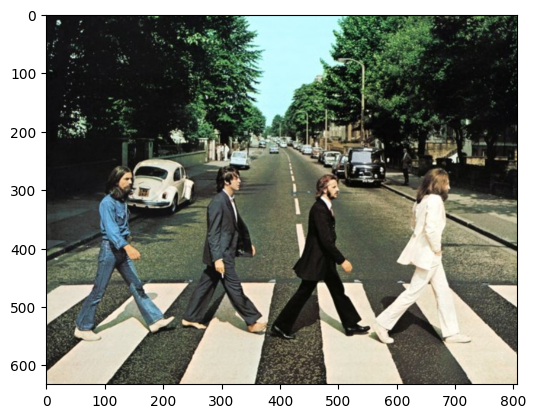

In [ ]:
plt.imshow(img)

In [ ]:
# 모델에 이미지를 넣는다.
start_time = time.time()
result = detector_model(img_for_input)
print('elapsed_time : ', time.time() - start_time)

elapsed_time :  7.328205347061157


Image를 tensor로 이미지 로딩 버전 시행 결과 딱히 numpy와 tensor의 inference 속도차이는 없었다.

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels = 3)
  print(img.shape, type(img))
  return img

In [ ]:
img = load_img('/content/data/beatles01.jpg')
img = tf.expand_dims(img, axis = 0)
converted_img = tf.image.convert_image_dtype(img, dtype = 'uint8')

start_time = time.time()
# image를 detector_model에 인자로 입력하여 inference 수행.
result = detector_model(converted_img)
print('elapsed time:', time.time()-start_time)


(633, 806, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>
elapsed time: 0.24165558815002441


inference 수행 반환값 확인
- inference 결과는 dictionary 형태로 반환, 개별 key값은 모델에 따라 달라질 수 있다.
- inference 결과로 반환된 bbox좌표는 0-1로 정규화 되어 있으며 ymin,xmin,ymax,xmax 형태로 반환됨

In [ ]:
# 키값 확인
print(result.keys())

dict_keys(['detection_boxes', 'detection_multiclass_scores', 'detection_scores', 'detection_anchor_indices', 'num_detections', 'raw_detection_scores', 'raw_detection_boxes', 'detection_classes'])


In [ ]:
result['num_detections']

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [ ]:
# 각 value들의 shape 확인
print(result['detection_classes'].shape, result['detection_scores'].shape, result['detection_boxes'].shape)

(1, 100) (1, 100) (1, 100, 4)


In [ ]:
# confidence_score가 내림차순으로 되어있는 걸 알 수 있다.
print('##### detection_scores #####')
print(result['detection_scores'])
print('##### detection_classes #####')
print(result['detection_classes'])

##### detection_scores #####
tf.Tensor(
[[0.94711393 0.935974   0.930035   0.89913994 0.6255411  0.48422304
  0.34820274 0.31519094 0.31252146 0.30964786 0.28922606 0.26785743
  0.26200423 0.25446662 0.2492044  0.24709295 0.22555462 0.2226233
  0.20144811 0.19892722 0.19818695 0.19184764 0.18933022 0.18806429
  0.17253916 0.16980892 0.16840708 0.16792467 0.16733839 0.16649994
  0.16592255 0.1640691  0.15594018 0.1449795  0.14482503 0.14451711
  0.14210096 0.13976097 0.13904285 0.1389741  0.13756561 0.13691291
  0.13502952 0.13211049 0.13042416 0.12915236 0.12603028 0.12460884
  0.12447878 0.12250291 0.12192409 0.12113379 0.12100728 0.11963242
  0.11917224 0.11773311 0.11646165 0.11581543 0.11349888 0.1134092
  0.11095151 0.10989272 0.10858461 0.10815836 0.10694698 0.10670077
  0.10592479 0.10550012 0.10536013 0.10419587 0.10418964 0.1032726
  0.10291872 0.10186005 0.10135229 0.1012119  0.10055878 0.09975421
  0.09954071 0.09945909 0.09853163 0.09829446 0.09807272 0.09666193
  0.0962896

In [ ]:
print('##### detection_boxes #####')
print(result['detection_boxes'])

##### detection_boxes #####
tf.Tensor(
[[[4.1179040e-01 6.3390389e-02 8.8111836e-01 2.6741689e-01]
  [4.3304449e-01 4.7706342e-01 8.9250046e-01 6.8628871e-01]
  [4.1960642e-01 6.8270773e-01 8.9688581e-01 8.9498097e-01]
  [4.1164529e-01 2.6410937e-01 8.6583096e-01 4.6428424e-01]
  [3.8654572e-01 1.7934969e-01 5.4316032e-01 3.2028845e-01]
  [3.6050096e-01 6.2638736e-01 4.6446508e-01 7.1950281e-01]
  [3.5996163e-01 6.2458235e-01 4.6350214e-01 7.2000319e-01]
  [7.1983784e-01 6.2759423e-01 8.6870378e-01 7.0305586e-01]
  [3.6646506e-01 3.8801342e-01 4.2244112e-01 4.3741155e-01]
  [3.5229647e-01 5.4654634e-01 3.8833630e-01 5.7694817e-01]
  [3.6912179e-01 5.8222091e-01 4.1025555e-01 6.2288415e-01]
  [3.7102416e-01 5.9425956e-01 4.3720046e-01 6.3780028e-01]
  [3.5444006e-01 4.7450614e-01 3.8303307e-01 4.9580967e-01]
  [7.1531904e-01 5.7743710e-01 8.7339020e-01 6.8964785e-01]
  [3.8982463e-01 1.7769307e-01 5.3870612e-01 3.1275195e-01]
  [3.5579172e-01 5.5832678e-01 3.9027628e-01 5.8628565e-01]
 

###Inference 결과 시각화

In [ ]:
# 1부터 91까지의 COCO Class id 매핑.
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [ ]:
def get_detector(module_handle="https://tfhub.dev/tensorflow/efficientdet/d0/1"):
  detector = hub.load(module_handle)
  return detector

detector_model = get_detector()

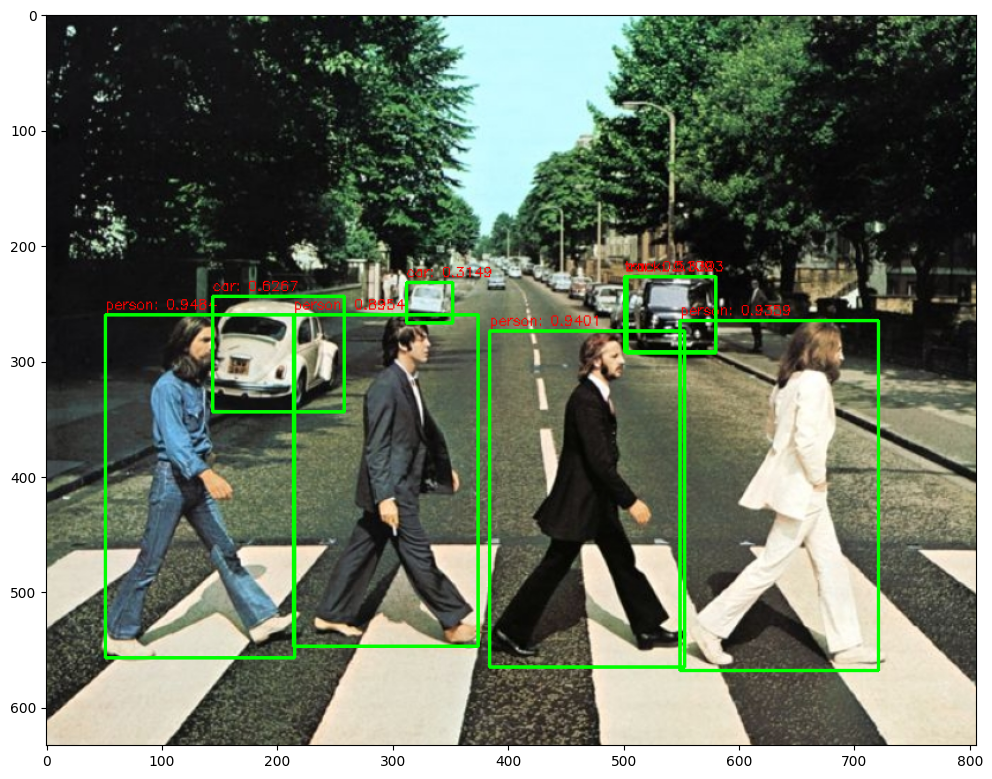

In [ ]:
import cv2

img = cv2.imread('/content/data/beatles01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# bbox ymin xmin ymax xmax 좌표는 0-1로 정규화 되어 있기 때문에 이미지의 height 와 width 값이 필요하다
img_shape = img.shape

height = img_shape[0]
width = img_shape[1]

draw_img = img.copy()
# print(height, width)

# 사각형과 문자를 넣을 색상
green = (0, 255, 0)
red = (255, 0, 0)

img_for_input = np.expand_dims(img, axis = 0)
# print(img_for_input.shape)

result = detector_model(img_for_input)

result = { key:value.numpy() for key,value in result.items()}

# confidence score threshold와 탐지할 최대 객체 수 설정
SCORE_THRESHOLD = 0.3
OBJECT_COUNT = 100


for i in range(min(OBJECT_COUNT, result['num_detections'][0])):
  score = result['detection_scores'][0, i]
  # print(score)
  if score >= SCORE_THRESHOLD:
    bbox = result['detection_boxes'][0, i]

    ymin = int(bbox[0]*height)
    xmin = int(bbox[1]*width)
    ymax = int(bbox[2]*height)
    xmax = int(bbox[3]*width)

    # print(ymin, xmin ,ymax, xmax)

    class_id = result['detection_classes'][0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    # print(caption)

    cv2.rectangle(draw_img, (xmin, ymin), (xmax,ymax), color = green,thickness = 2)
    cv2.putText(draw_img, caption, (xmin, ymin-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red, 1)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [ ]:
# 위의 Inference 시각화 코드를 함수화

# bbox ymin xmin ymax xmax 좌표는 0-1로 정규화 되어 있기 때문에 이미지의 height 와 width 값이 필요하다
def get_detected_img(model, img, SCORE_THRESHOLD, object_show_count = 100):
  img_shape = img.shape

  height = img_shape[0]
  width = img_shape[1]

  draw_img = img.copy()
  # print(height, width)

  # 사각형과 문자를 넣을 색상
  green = (0, 255, 0)
  red = (255, 0, 0)

  img_for_input = np.expand_dims(img, axis = 0)
  # print(img_for_input.shape)

  start_time = time.time()

  result = detector_model(img_for_input)

  print('elapsed time : ', time.time() - start_time)

  result = { key:value.numpy() for key,value in result.items()}



  for i in range(min(OBJECT_COUNT, result['num_detections'][0])):
    score = result['detection_scores'][0, i]
    # print(score)
    if score >= SCORE_THRESHOLD:
      bbox = result['detection_boxes'][0, i]

      ymin = int(bbox[0]*height)
      xmin = int(bbox[1]*width)
      ymax = int(bbox[2]*height)
      xmax = int(bbox[3]*width)

      # print(ymin, xmin ,ymax, xmax)

      class_id = result['detection_classes'][0, i]
      caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
      # print(caption)

      cv2.rectangle(draw_img, (xmin, ymin), (xmax,ymax), color = green,thickness = 2)
      cv2.putText(draw_img, caption, (xmin, ymin-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red, 1)

  return draw_img


elapsed time :  0.3411068916320801


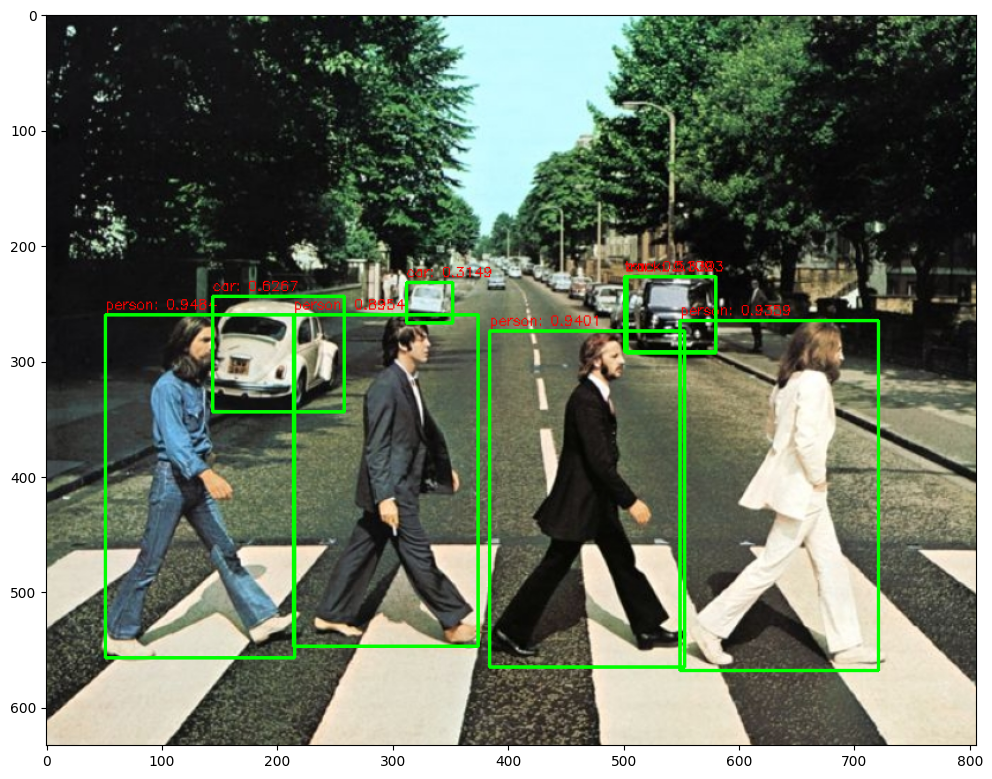

In [ ]:
# 함수화 결과
img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, SCORE_THRESHOLD=0.3)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [ ]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2023-08-19 07:43:36--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.008s  

2023-08-19 07:43:36 (9.39 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



elapsed time :  0.22156214714050293


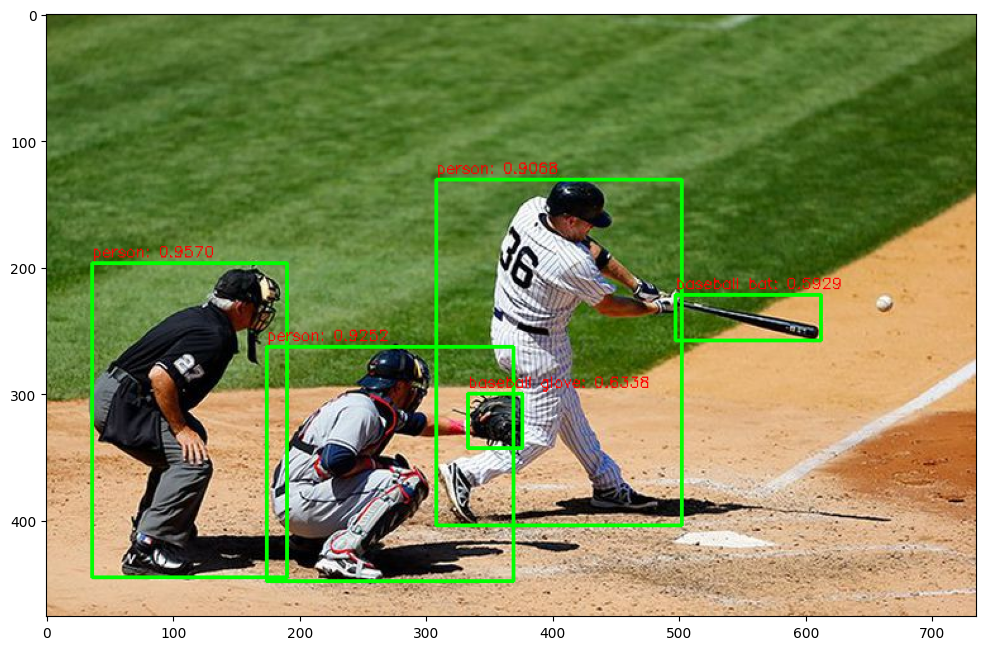

In [ ]:
img_array = cv2.cvtColor(cv2.imread('/content/data/baseball01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model,img_array, 0.5)
plt.figure(figsize=(12, 14))
plt.imshow(draw_img)

Efficient D2 모델 Inference 수행

In [ ]:
detector_model_d2 = get_detector('https://tfhub.dev/tensorflow/efficientdet/d2/1')

elapsed time :  0.22633147239685059


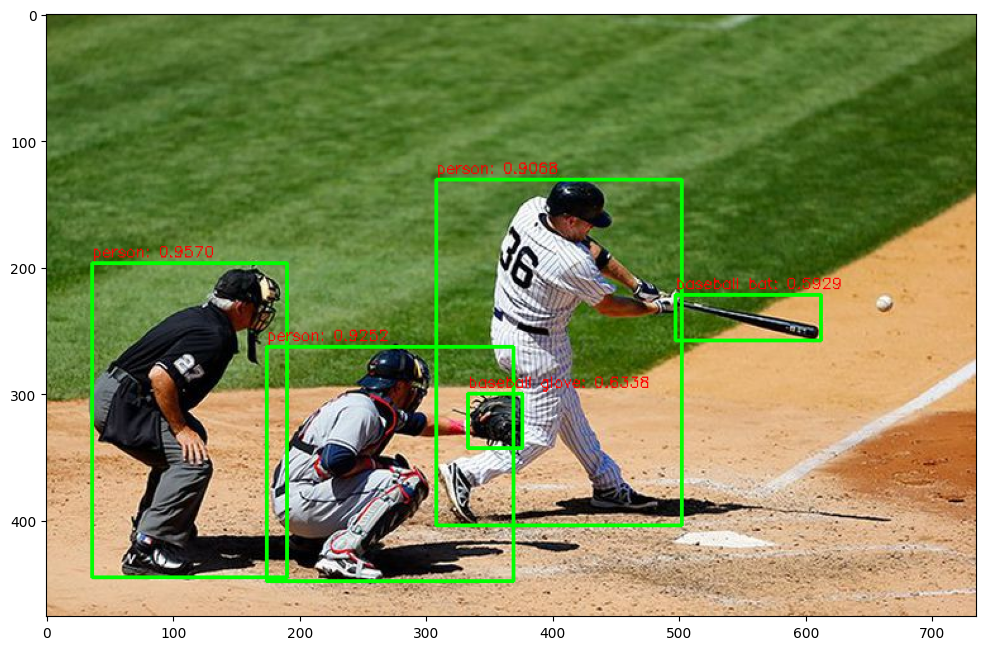

In [ ]:
draw_img = get_detected_img(detector_model_d2, img_array, 0.5, object_show_count=100)
plt.figure(figsize=(12, 14))
plt.imshow(draw_img)
